In [23]:
import pandas as pd

# *Litecoin Prices* (Populated Dataset) #

In [24]:
df = pd.read_csv(".\data\coin_Litecoin.csv")

In [25]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


### I'm going to compare the relation between the <ins>*highest price*</ins> and the <ins>*volume transacted*</ins> on a given day ###

In [26]:
df.drop(['SNo', 'Name', 'Symbol', 'Date', 'Low', 'Open', 'Close', 'Marketcap'], axis=1, inplace=True)

In [27]:
df.head()

,High,Volume
0,4.57360,0.0
1,4.57238,0.0
2,4.35686,0.0
3,4.03930,0.0
4,3.45361,0.0


In [28]:
xVal = df.High
yVal = df.Volume

In [29]:
import matplotlib.pyplot as plt

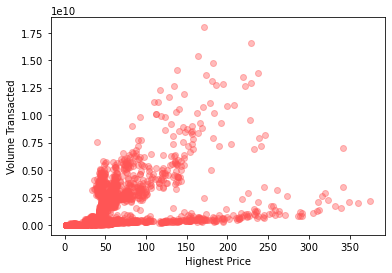

In [30]:
plt.scatter(xVal, yVal, c='#f55', alpha=0.4)
plt.xlabel('Highest Price')
plt.ylabel('Volume Transacted')
plt.show()

In [31]:
import numpy as np

In [32]:
covar = np.cov(xVal, yVal)[0,1]

In [33]:
print(covar)

59607866323.19599


In [34]:
corr = np.corrcoef(xVal, yVal)[0,1]

In [35]:
print(corr)

0.5221820165434347


### The Pearson correlation value of `0.5222` indicates that the highest price of Litecoin on a given day has some effect on the total volume transacted on the same day, however, this relation is very lenient and not quite strong ###

<hr/>

# *Reddit's post on Vaccin Myths* (Sparse Dataset) #

In [36]:
df = pd.read_csv('.\data\\reddit_vm.csv')

In [37]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


### I'll work on the realtion of the post <ins>*score*</ins> and the number of <ins>*comments*</ins> on that post ###

In [38]:
df.drop(['title', 'id', 'url', 'created', 'body', 'timestamp'], axis=1, inplace=True)

In [39]:
df.head()

,score,comms_num
0,7,0
1,2,1
2,6,0
3,1,0
4,6,0


In [40]:
xVal = df.score
yVal = df.comms_num

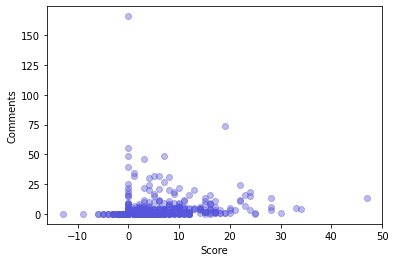

In [41]:
plt.scatter(xVal, yVal, c='#55d', alpha=0.4)
plt.xlabel('Score')
plt.ylabel('Comments')
plt.show()

### From this visual representation, we can expect the points to have a closer distance ###

In [42]:
from scipy.spatial.distance import cosine, cityblock, euclidean, minkowski

In [43]:
cos = round(cosine(xVal, yVal), 2)
manhat = round(cityblock(xVal, yVal), 2)
eucl = round(euclidean(xVal, yVal), 2)
mink = round(minkowski(xVal, yVal, p=10), 2)

In [44]:
print(f"Cosine: \t{cos}\nManhatttan:\t{manhat}\nEuclidean:\t{eucl}\nMinkowski:\t{mink}")

Cosine: 	0.71
Manhatttan:	4641
Euclidean:	278.53
Minkowski:	166.0


### Since the data is sparse here, the *Cosine Distance* (`0.71`) shows a better relation than any of the other distance metrics ###